In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set3')
import matplotlib.pyplot as plt

In [3]:
# All columns 
all_cols = [ 'AddressID', 'StreetID', 'SuburbID',
   'PostcodeID', 'StateID', 'Postcode', 'EventPrice',
   'FirstAdvertisedEventPrice', 'LastAdvertisedEventPrice', 'PropertyType', 
   'AreaSize', 'Bedrooms', 'Baths', 'Parking',
   'HasStudy', 'HasSeparateDining', 'HasFamilyRoom', 'HasSunroom',
   'HasBilliardRoom', 'HasRumpusRoom', 'HasFireplace', 'HasWalkInWardrobe',
   'HasCourtyard', 'HasInternalLaundry', 'HasHeating', 'HasSauna',
   'HasAirConditioning', 'HasBalcony', 'HasBarbeque',
   'HasPolishedTimberFloor', 'HasEnsuite', 'HasSpa', 'HasGarage',
   'HasLockUpGarage', 'HasPool', 'HasTennisCourt', 'HasBeenRenovated',
   'HasAlarm', 'HasWaterView', 'HasHarbourView', 'HasOceanView',
   'HasCityView', 'HasBushView', 'HasDistrictView', 'HasBayView',
   'HasParkView', 'HasRiverView', 'HasMountainView', 'Latitude',
   'Longitude','Suburb' ]

In [4]:
                          #### NOTE - Distance to Suburb Centre feature #### 
                     ### Added Lat Lon and changed PostCode data type into str ###

        

# Use a composite key, address and streed if for unique identification
index_col = ['AddressID', 'StreetID', 'SuburbID']

# Use these columns for training
use_cols = [ 'AddressID', 'StreetID', 'SuburbID', 'EventPrice', 'Postcode', 'Suburb',
   'FirstAdvertisedEventPrice', 'LastAdvertisedEventPrice', 'PropertyType', 
   'AreaSize', 'Bedrooms', 'Baths', 'Parking',
   'HasStudy', 'HasSeparateDining', 'HasFamilyRoom', 'HasSunroom',
   'HasBilliardRoom', 'HasRumpusRoom', 'HasFireplace', 'HasWalkInWardrobe',
   'HasCourtyard', 'HasInternalLaundry', 'HasHeating', 'HasSauna',
   'HasAirConditioning', 'HasBalcony', 'HasBarbeque',
   'HasPolishedTimberFloor', 'HasEnsuite', 'HasSpa', 'HasGarage',
   'HasLockUpGarage', 'HasPool', 'HasTennisCourt', 'HasBeenRenovated',
   'HasAlarm', 'HasWaterView', 'HasHarbourView', 'HasOceanView',
   'HasCityView', 'HasBushView', 'HasDistrictView', 'HasBayView',
   'HasParkView', 'HasRiverView', 'HasMountainView', 'Latitude', 'Longitude' ]

# Define dtypes 
dtypes = {
    'AddressID': 'str', 
    'Suburb': 'str',
    'StreetID': 'str', 
    'SuburbID': 'str',
    'Postcode': 'str',
    'HasInternalLaundry': 'str',
    'HasPolishedTimberFloor': 'str',
    'HasHeating': 'str',
    'HasPolished': 'str',
    'HasBarbeque': 'str',
    'HasCityView': 'str',
    'HasBushView': 'str',
    'HasDistrictView': 'str',
    'HasBayView': 'str',
    'HasParkView': 'str',
    'HasRiverView': 'str',
    'HasMountainView': 'str',
    'Latitude': 'float',
    'Longitude': 'float'
}


In [5]:
# Read Data
df = pd.read_csv('house_valuation.csv', dtype=dtypes, index_col=index_col, usecols=use_cols)

In [6]:
# Replace True / False with 1 / 0
df = df.applymap(lambda x: 1 if x == 'True' or x == True or x == 'TRUE' else x)
df.fillna(0, inplace=True)
df.head()

,,,Suburb,Postcode,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,PropertyType,AreaSize,Bedrooms,Baths,Parking,...,HasOceanView,HasCityView,HasBushView,HasDistrictView,HasBayView,HasParkView,HasRiverView,HasMountainView,Latitude,Longitude
AddressID,StreetID,SuburbID,,,,,,,,,,,,,,,,,,,,,
6696690.0,570262.0,25012,Lane Cove West,2066,635000.0,0.0,0.0,House,552.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81199,151.153137
6710176.0,570262.0,25012,Lane Cove West,2066,657000.0,0.0,0.0,House,624.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81211,151.155472
6847417.0,570262.0,25012,Lane Cove West,2066,650000.0,0.0,0.0,House,714.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81164,151.159271
7166599.0,570262.0,25012,Lane Cove West,2066,608000.0,0.0,0.0,House,348.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81176,151.158737
6295691.0,570262.0,25012,Lane Cove West,2066,819000.0,0.0,0.0,House,711.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81125,151.159973


In [7]:
df.describe(include='all')

,Suburb,Postcode,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,PropertyType,AreaSize,Bedrooms,Baths,Parking,...,HasOceanView,HasCityView,HasBushView,HasDistrictView,HasBayView,HasParkView,HasRiverView,HasMountainView,Latitude,Longitude
count,41697,41697,4.169700e+04,4.169700e+04,4.169700e+04,41697,4.169700e+04,41697.000000,41697.000000,41697.000000,...,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000,41697.000000
unique,976,357,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mosman,2026,NaN,NaN,NaN,House,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,942,1232,NaN,NaN,NaN,26652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.172697e+05,2.921318e+04,2.224872e+04,NaN,1.816390e+03,2.717558,0.648512,0.001295,...,0.022088,0.008922,0.004101,0.004892,0.001199,0.001703,0.001223,0.000408,-32.851364,146.737974
std,NaN,NaN,5.135645e+05,1.710393e+05,1.460993e+05,NaN,6.290771e+04,1.164731,1.025090,0.065691,...,0.146971,0.094033,0.063908,0.069775,0.034608,0.041230,0.034952,0.020188,5.717145,25.519088
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.841730,0.000000
25%,NaN,NaN,3.500000e+05,0.000000e+00,0.000000e+00,NaN,3.590000e+02,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.904410,151.109283
50%,NaN,NaN,5.025000e+05,0.000000e+00,0.000000e+00,NaN,6.080000e+02,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.875670,151.176926
75%,NaN,NaN,7.370000e+05,0.000000e+00,0.000000e+00,NaN,9.500000e+02,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.808610,151.238281


In [8]:
# print(df.info())
# print(df.groupby('Postcode').size())
# 16 wo postcode
# print(df.groupby('PropertyType').size())
# 0                1
# Cottage        633
# Duplex         155
# House        26652
# Semi           599
# Studio         187
# Terrace        815
# Townhouse      772
# Unit         11728
# Villa          155
# print(df.groupby('Bedrooms').size())
# Bedrooms
# 0.0      2053
# 1.0      1957
# 2.0     13025
# 3.0     15968
# 4.0      6579
# 5.0      1765
# 6.0       299
# 7.0        26
# 8.0         8
# 9.0        10
# 10.0        2
# 13.0        3
# 19.0        1
# 54.0        1
# print(df.groupby('Baths').size())
# Baths
# 0.0    25989
# 1.0     3326
# 2.0     7883
# 3.0     1975
# 4.0      377
# 5.0       70
# 6.0       21
# 7.0        3

In [9]:
# remove rows wherere proptype = 0
df = df[df.PropertyType != 0]
# remove rows where postcode = NaN
df = df[df.Postcode != 0]
# remove rows where bedrooms = 0
df = df[df.Bedrooms != 0]
# check data
df.describe(include='all')

,Suburb,Postcode,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,PropertyType,AreaSize,Bedrooms,Baths,Parking,...,HasOceanView,HasCityView,HasBushView,HasDistrictView,HasBayView,HasParkView,HasRiverView,HasMountainView,Latitude,Longitude
count,39644,39644,3.964400e+04,3.964400e+04,3.964400e+04,39644,3.964400e+04,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,940,349,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mosman,2026,NaN,NaN,NaN,House,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,919,1185,NaN,NaN,NaN,25695,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.209690e+05,3.035815e+04,2.313577e+04,NaN,1.799800e+03,2.858289,0.681616,0.000706,...,0.022853,0.009056,0.004288,0.005121,0.001211,0.001715,0.001261,0.000429,-33.058898,147.660349
std,NaN,NaN,5.047153e+05,1.747833e+05,1.494583e+05,NaN,6.448902e+04,1.012221,1.040261,0.040797,...,0.149438,0.094730,0.065344,0.071376,0.034776,0.041381,0.035492,0.020704,5.105498,22.785948
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.841730,0.000000
25%,NaN,NaN,3.560000e+05,0.000000e+00,0.000000e+00,NaN,3.530000e+02,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.904880,151.111786
50%,NaN,NaN,5.100000e+05,0.000000e+00,0.000000e+00,NaN,6.030000e+02,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.876490,151.177650
75%,NaN,NaN,7.400000e+05,0.000000e+00,0.000000e+00,NaN,9.320000e+02,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.809947,151.238876


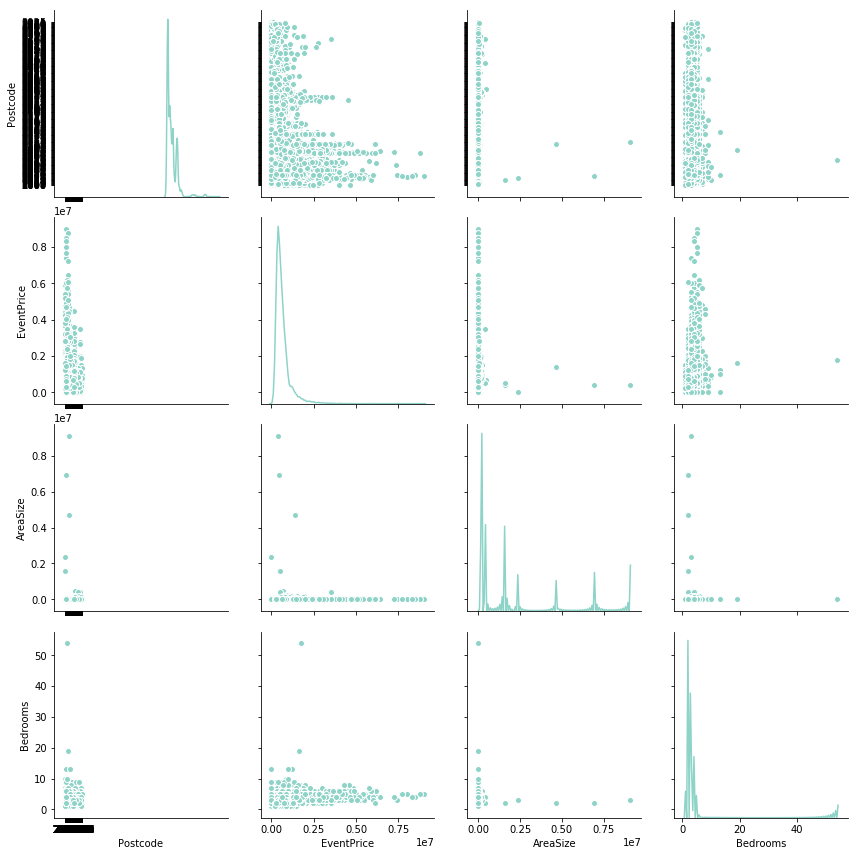

In [10]:
#PairGrid - PostCode, Event Price, Property Type, Area Size, Bedrooms
cols_for_pairplot = [ 'Postcode', 'EventPrice', 'PropertyType', 'AreaSize', 'Bedrooms']
sns.pairplot(df[cols_for_pairplot], size=3, diag_kind='kde', aspect=1)

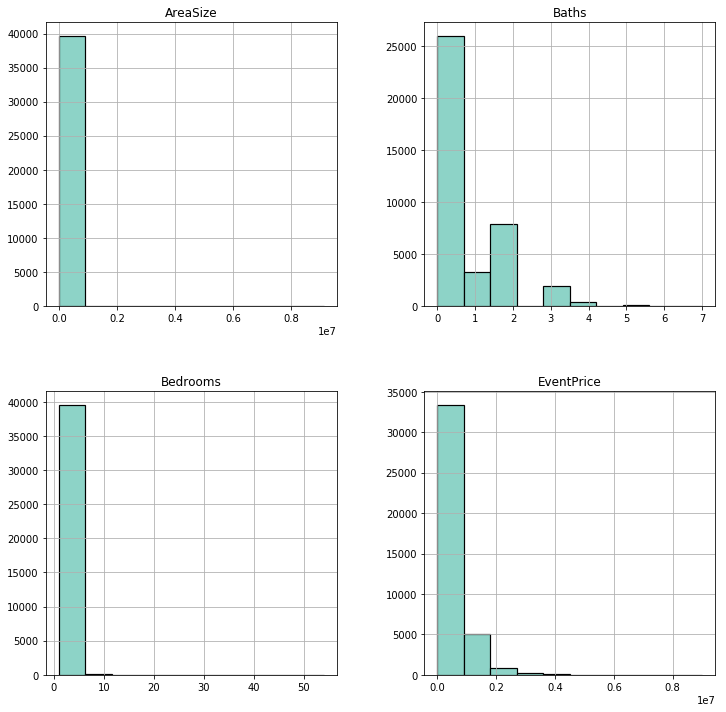

In [11]:
cols_for_hist = ['EventPrice', 'AreaSize', 'Bedrooms', 'Baths']
hist_data = df[cols_for_hist]
hist_data.hist(edgecolor='black', linewidth=1.2, figsize=(12,12))
plt.show()

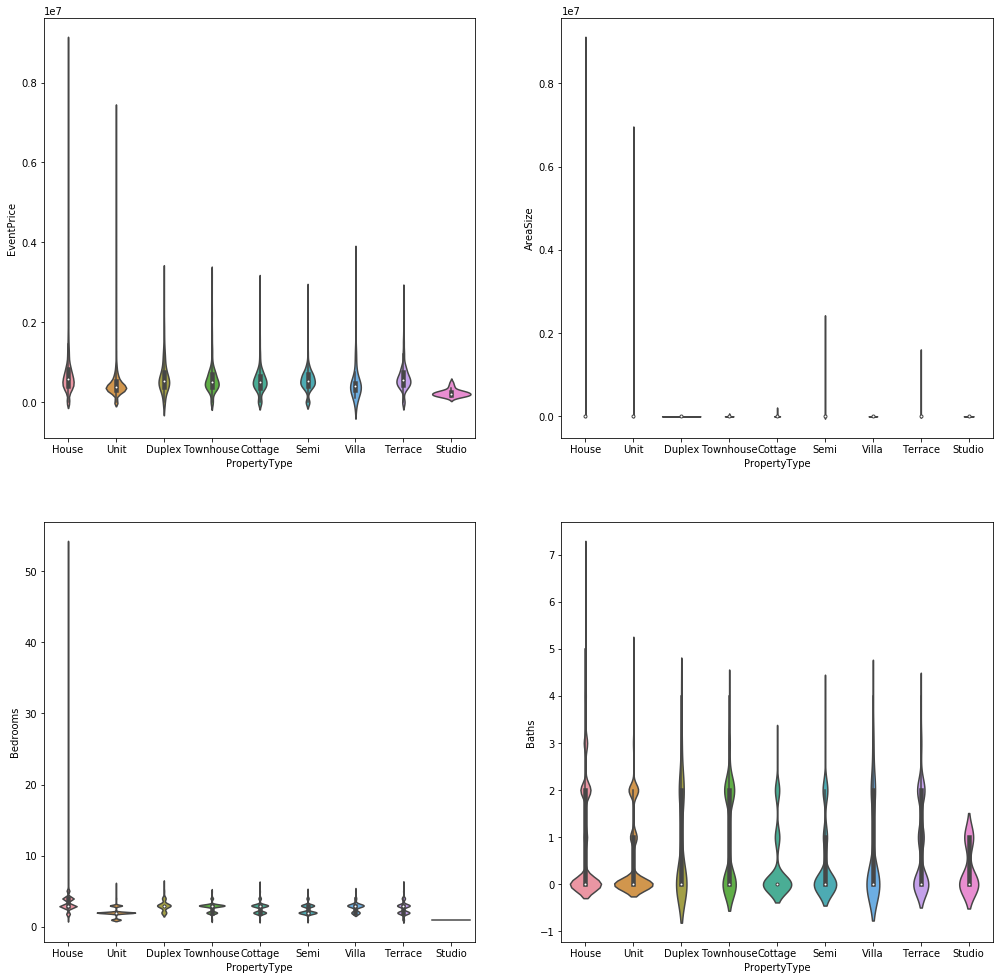

In [12]:
plt.figure(figsize=(17,17))
plt.subplot(2, 2, 1)
sns.violinplot(x='PropertyType', y='EventPrice', data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x='PropertyType', y='AreaSize', data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x='PropertyType', y='Bedrooms', data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x='PropertyType', y='Baths', data=df)

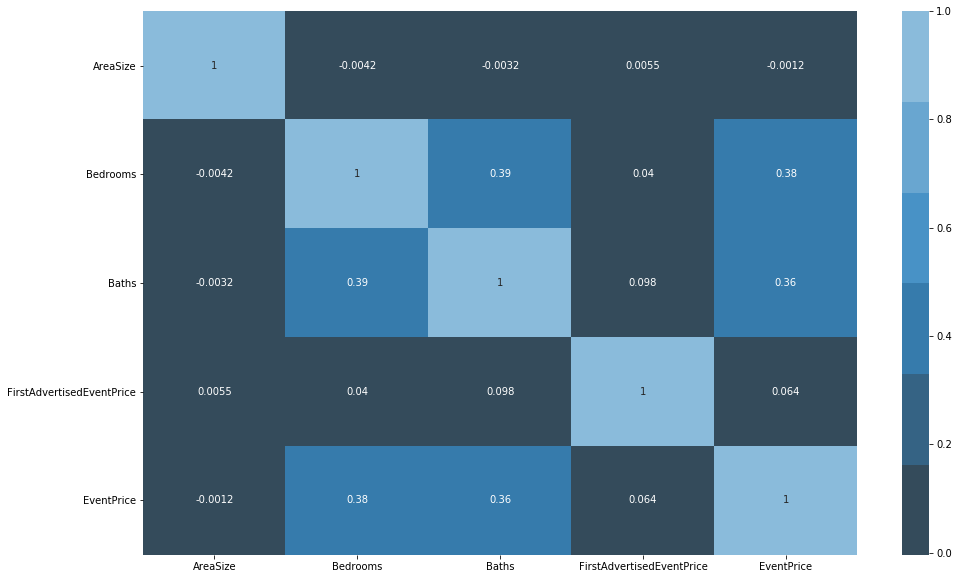

In [13]:
cols_for_pairplot = ['AreaSize', 'Bedrooms', 'Baths', 'FirstAdvertisedEventPrice', 'EventPrice']
pairplotdata = df[cols_for_pairplot]

plt.figure(figsize=(16,10))
sns.heatmap(pairplotdata.corr(), annot=True, cmap=sns.color_palette('Blues_d'))
plt.show()

In [14]:
# Convert all categ. to binary features
df_w_dummies = pd.get_dummies( df, columns = ['PropertyType', 'Postcode'])

df_w_dummies.head(15)

,,,Suburb,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,AreaSize,Bedrooms,Baths,Parking,HasStudy,HasSeparateDining,...,Postcode_2783,Postcode_2785,Postcode_2786,Postcode_2800,Postcode_2821,Postcode_2830,Postcode_2850,Postcode_2871,Postcode_2880,Postcode_3025
AddressID,StreetID,SuburbID,,,,,,,,,,,,,,,,,,,,,
6696690.0,570262.0,25012,Lane Cove West,635000.0,0.0,0.0,552.0,4.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6710176.0,570262.0,25012,Lane Cove West,657000.0,0.0,0.0,624.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6847417.0,570262.0,25012,Lane Cove West,650000.0,0.0,0.0,714.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166599.0,570262.0,25012,Lane Cove West,608000.0,0.0,0.0,348.0,3.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6295691.0,570262.0,25012,Lane Cove West,819000.0,0.0,0.0,711.0,3.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
12041125.0,594852.0,25002,Lane Cove North,380000.0,0.0,0.0,2954.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12113930.0,594852.0,25002,Lane Cove North,280000.0,0.0,0.0,2868.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12096699.0,616052.0,25002,Lane Cove North,508500.0,0.0,0.0,405.0,3.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12118882.0,616052.0,25002,Lane Cove North,546000.0,0.0,0.0,659.0,3.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# df_w_dummies.describe()
df_w_dummies.columns

Index(['Suburb', 'EventPrice', 'FirstAdvertisedEventPrice',
       'LastAdvertisedEventPrice', 'AreaSize', 'Bedrooms', 'Baths', 'Parking',
       'HasStudy', 'HasSeparateDining',
       ...
       'Postcode_2783', 'Postcode_2785', 'Postcode_2786', 'Postcode_2800',
       'Postcode_2821', 'Postcode_2830', 'Postcode_2850', 'Postcode_2871',
       'Postcode_2880', 'Postcode_3025'],
      dtype='object', length=402)

# Outlier Detector 

In [16]:
#outlier detector function
def FindQuartiles(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [17]:
#check for outliers in AreaSize 
indices, values = FindQuartiles(df_w_dummies['AreaSize'])
print(np.sort(values))

[6.420e+02 8.590e+02 9.590e+02 ... 4.679e+06 6.945e+06 9.105e+06]


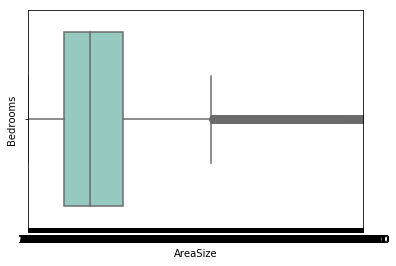

In [18]:
#boxplot AreaSize 
sns.boxplot(x="AreaSize", data=df_w_dummies)

#boxplot AreaSize vs Bedroom
sns.boxplot(x="AreaSize", y="Bedrooms", data=df_w_dummies)

# Distance to Suburb Centre feature
#### Formula - https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula/21623206#21623206 
#### dataset - http://www.corra.com.au/australian-postcode-location-data/

In [19]:
#function to calculate the distance 
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) #2*R*asin...

In [20]:
#Read dataset
use_cols = ['postcode','suburb','lat','lon']
# Define dtypes
dtypes = {
    'postcode': 'str', 
    'suburb' : 'str',
    'lat': 'float',
    'lon': 'float'
}

# Read Data
suburb_geo_df = pd.read_csv('NSW_postcode_lat_lon.csv', dtype=dtypes, usecols=use_cols)

In [21]:
#create a unique id (postcode,left(suburb,3))
suburb_geo_df['uid'] = suburb_geo_df['postcode']+(suburb_geo_df['suburb'].str.lower()).str.slice(start=0, stop=3).astype(str)
df['uid'] = df['Postcode'].astype(str)+(df['Suburb'].str.lower()).str.slice(start=0, stop=3).astype(str)

In [22]:
suburb_geo_df.head()

,postcode,suburb,lat,lon,uid
0,1001,SYDNEY,-33.794883,151.268071,1001syd
1,1002,SYDNEY,-33.794883,151.268071,1002syd
2,1003,SYDNEY,-33.794883,151.268071,1003syd
3,1004,SYDNEY,-33.794883,151.268071,1004syd
4,1005,SYDNEY,-33.794883,151.268071,1005syd


In [23]:
df.head()

,,,Suburb,Postcode,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,PropertyType,AreaSize,Bedrooms,Baths,Parking,...,HasCityView,HasBushView,HasDistrictView,HasBayView,HasParkView,HasRiverView,HasMountainView,Latitude,Longitude,uid
AddressID,StreetID,SuburbID,,,,,,,,,,,,,,,,,,,,,
6696690.0,570262.0,25012,Lane Cove West,2066,635000.0,0.0,0.0,House,552.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81199,151.153137,2066lan
6710176.0,570262.0,25012,Lane Cove West,2066,657000.0,0.0,0.0,House,624.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81211,151.155472,2066lan
6847417.0,570262.0,25012,Lane Cove West,2066,650000.0,0.0,0.0,House,714.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81164,151.159271,2066lan
7166599.0,570262.0,25012,Lane Cove West,2066,608000.0,0.0,0.0,House,348.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81176,151.158737,2066lan
6295691.0,570262.0,25012,Lane Cove West,2066,819000.0,0.0,0.0,House,711.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.81125,151.159973,2066lan


In [24]:
#drop Postcode and suburb name for the lookup list
suburb_geo_df = suburb_geo_df.drop(['postcode'],1)
suburb_geo_df = suburb_geo_df.drop(['suburb'],1)

In [25]:
# remove rows wherere Latitude = 0
df = df[df.Latitude != 0]
# remove rows where Longitude = 0
df = df[df.Longitude != 0]

In [26]:
# merge is returning NaN - ToDo
df = pd.merge(suburb_geo_df, df, on='uid', how='right')

In [27]:
df['distance'] = df.apply(lambda x: distance(x['Latitude'], x['Longitude'], x['lat'], x['lon']), axis=1)

In [28]:
df.head(20)

,lat,lon,uid,Suburb,Postcode,EventPrice,FirstAdvertisedEventPrice,LastAdvertisedEventPrice,PropertyType,AreaSize,...,HasCityView,HasBushView,HasDistrictView,HasBayView,HasParkView,HasRiverView,HasMountainView,Latitude,Longitude,distance
0,-33.855601,151.208220,2000daw,Dawes Point,2000,751000.0,0.0,0.0,Villa,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.85809,151.205917,0.349010
1,-33.855601,151.208220,2000daw,Dawes Point,2000,1110000.0,0.0,0.0,House,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.85785,151.206116,0.316693
2,-33.855601,151.208220,2000daw,Dawes Point,2000,791000.0,790000.0,790000.0,House,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.85746,151.205826,0.302665
3,-33.855601,151.208220,2000daw,Dawes Point,2000,2465000.0,0.0,0.0,House,3179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.85689,151.206162,0.238065
4,-33.880777,151.202796,2000hay,Haymarket,2000,420000.0,0.0,0.0,Unit,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.88016,151.203201,0.078146
5,-33.880777,151.202796,2000hay,Haymarket,2000,721000.0,0.0,0.0,Unit,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.88016,151.203201,0.078146
6,-33.858315,151.203519,2000mil,Millers Point,2000,650000.0,0.0,0.0,Terrace,477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.86108,151.204010,0.310779
7,-33.858315,151.203519,2000mil,Millers Point,2000,915000.0,0.0,0.0,Unit,2875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.86226,151.204285,0.444325
8,-33.858315,151.203519,2000mil,Millers Point,2000,780000.0,790000.0,750000.0,Unit,1628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.86295,151.203567,0.515408
9,-33.858315,151.203519,2000mil,Millers Point,2000,950000.0,0.0,0.0,Unit,2875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.86226,151.204285,0.444325


In [29]:
#drop lat lon & uid
df = df.drop(['lat'],1)
df = df.drop(['lon'],1)
df = df.drop(['uid'],1)

# Models

In [ ]:
# Prepare sets
data_for_linear_reg = df_w_dummies.drop('EventPrice', 1)
data_for_linear_reg = df_w_dummies.drop('Suburb', 1)

In [ ]:
X = data_for_linear_reg.values
y = df_w_dummies['EventPrice'].values

In [ ]:
print(X.shape)
print(y.shape)

# LinearRegression Model

In [ ]:
# LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
y_pred = model.predict(X)

In [ ]:
y

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
print('Explained Variance \t {:0.4f}'.format(explained_variance_score(y, y_pred)))
print('MAE \t\t\t {:0.0f}'.format(mean_absolute_error(y, y_pred)))
print('MSE \t\t\t {:0.0f}'.format(mean_squared_error(y, y_pred)))
# print('MSE log {}'.format(mean_squared_log_error(y, y_pred)))
print('Median AE \t\t {:0.0f}'.format(median_absolute_error(y, y_pred)))
print('R2-score \t\t {:0.2f}'.format(r2_score(y,y_pred)))

# Random Forest Regression Model

In [ ]:
# change the propertyType to categorical 
df_dummies = pd.get_dummies( df, columns = ['PropertyType'])

In [ ]:
#Prepare Sets
from sklearn.model_selection import train_test_split

# seed
random_seed = 42
# controls size of holdout set
holdout_fraction = 0.2


data_for_random_forest = df_dummies.drop('EventPrice', 1)

X = data_for_random_forest.values
y = df_dummies['EventPrice'].values

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=holdout_fraction,random_state=random_seed)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_holdout)

test_score = r2_score(y_holdout, predicted_test)
spearman = spearmanr(y_holdout, predicted_test)
pearson = pearsonr(y_holdout, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')


# SVR Model


In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

data_for_SVR = df_dummies.drop('EventPrice', 1)

X = data_for_SVR.values
y = df_dummies['EventPrice'].values

#Run three SVR Models 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) #Radial Basis Function
svr_lin = SVR(kernel='linear', C=1e3) #Linear
svr_poly = SVR(kernel='poly', C=1e3, degree=2) #Polynomial 

#fit the model
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
#plot the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
#check the score
score(X, y, sample_weight=None)

# Knearest Neighbor (KNN) Model

In [ ]:
## TBC 